**Abstract**
In telecom companies it’s very important to analyze the big data of costumers to evaluate the quality of the service. The term "churn value" typically refers to a metric or measure used in business and customer analytics to determine the rate at which customers stop using a service or product over a given period. This is crucial for companies to understand customer retention and predict future customer behavior. The churn value helps businesses take proactive steps to improve customer retention and optimize their offerings.

**Introduction**
Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and function of the human brain. They are widely used for a variety of tasks including classification, regression, and pattern recognition. 

Batch Normalization (Batch Norm) is a technique used to improve the training of neural networks. It normalizes the inputs to a layer, which helps stabilize and accelerate the training process.

The main purpose from Telecom data analysis is to determine if the customer period of using the service will end shortly or it will extend. So our label is Ture or False.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_excel('D:/Deep learning/2/Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({"Col":cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})
        

In [4]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,CustomerID,object,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",0
1,Count,int64,1,[1],0
2,Country,object,1,[United States],0
3,State,object,1,[California],0
4,City,object,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",0
5,Zip Code,int64,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",0
6,Lat Long,object,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",0
7,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
8,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
9,Gender,object,2,"[Male, Female]",0


In [5]:
data.drop(['CustomerID','Churn Label','Count','Country','State','Zip Code','Lat Long','City'],axis=1,inplace=True)

In [6]:
data

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,45,5306,NaN
7039,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,One year,Yes,Mailed check,84.80,1990.5,0,59,2140,NaN
7040,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,71,5560,NaN
7041,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN


In [7]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Contract']=le.fit_transform(data['Contract'])

In [9]:
data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [10]:
data['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [11]:
data['Churn Reason'].fillna("not leave",inplace=True)

In [12]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [13]:
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')

In [14]:
data['Total Charges'].isna().sum()

11

In [15]:
data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)

In [16]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [17]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,...,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Churn Reason_not leave
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,True,...,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,False,...,False,False,True,False,False,False,False,False,False,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,False,...,False,False,True,False,False,False,False,False,False,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,False,...,False,False,True,False,False,False,False,False,False,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,True,...,False,False,False,False,False,False,False,False,False,False


The model structure contains:
-	A fully connected Dense layer with 10 units.
-	Batch Normalization after the Dense layer (we will test its effect).
-	An activation function applied after batch normalization (we will determine the best function).
-	A final Dense layer with 10 units and a softmax activation function for multi-class classification.
-	A sigmoid function as or output is 0 or 1.


In [18]:
X=data.drop(['Churn Value'],axis=1).values
y=data['Churn Value'].values

In [19]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [20]:
#fearture scaling 
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

In [22]:
# Create a Sequential model
model = Sequential()

# Add a Dense layer with 10 units and ReLU activation
model.add(Dense(10, activation='relu', input_shape=(train_X.shape[1],)))

# Add Batch Normalization
model.add(BatchNormalization())

# Add the tanh activation function
model.add(Activation('relu'))

# Add the final Dense layer with 10 units and softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 20 (80.00 B)

In [23]:
from tensorflow.keras.optimizers import SGD,Adam

In [24]:
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [25]:
history=model.fit(train_X,train_y,validation_split=0.1,batch_size=128,epochs=20)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4205 - loss: 0.6983 - val_accuracy: 0.8475 - val_loss: 0.6571
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 0.6500 - val_accuracy: 0.8652 - val_loss: 0.6146
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.6079 - val_accuracy: 0.8989 - val_loss: 0.5676
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.5590 - val_accuracy: 0.9486 - val_loss: 0.5157
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.5110 - val_accuracy: 0.9716 - val_loss: 0.4689
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.4659 - val_accuracy: 0.9628 - val_loss: 0.4294
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.4242 - val_accuracy: 0.9628 - val_loss: 0.3929
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9677 - loss: 0.3891 - val_accuracy: 0.9699 - val_loss:

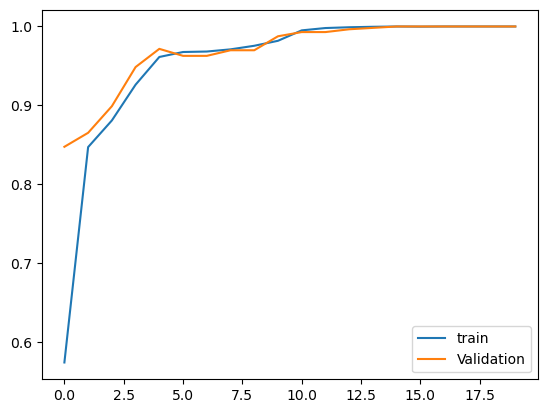

In [26]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

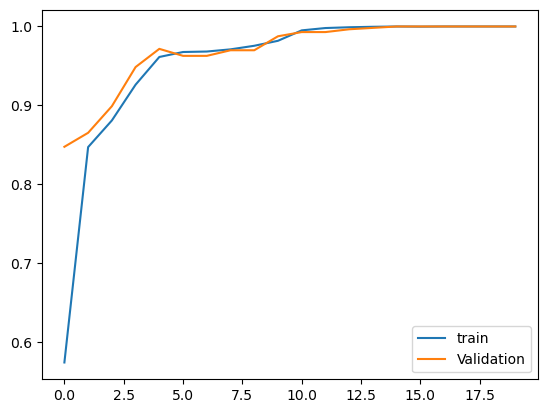

In [27]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

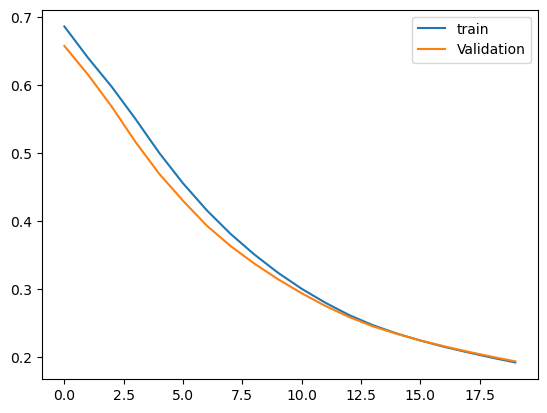

In [28]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

In [29]:
y_pred=model.predict(test_X)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [30]:
y_p=[]
for i in y_pred:
    if i >0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [31]:
model.evaluate(test_X,test_y)[1]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1902


1.0

In [37]:
from tabulate import tabulate

headers1 = ['Activation Function', 'No.epochs', 'Total params','accuracy','loss']
table1 = [
    ['Sigmoid', '20', '701','100%','0.3145'],
    ['Tanh','20', '701','100%','0.1911'],
    ['ReLU', '20', '701','100%','0.1887']   
]

headers2 = ["Activation function(relu)", 'Total params','accuracy','loss']
table2 = [
    ['Without batch normalization','661','99.85%','0.2301'],
    ['With batch normalization','701','100%','0.1902'],
]
A = tabulate(table1, headers=headers1, tablefmt='grid')
B = tabulate(table2, headers=headers2, tablefmt='grid')
print(A)
print(B)

+-----------------------+-------------+----------------+------------+--------+
| Activation Function   |   No.epochs |   Total params | accuracy   |   loss |
+=======================+=============+================+============+========+
| Sigmoid               |          20 |            701 | 100%       | 0.3145 |
+-----------------------+-------------+----------------+------------+--------+
| Tanh                  |          20 |            701 | 100%       | 0.1911 |
+-----------------------+-------------+----------------+------------+--------+
| ReLU                  |          20 |            701 | 100%       | 0.1887 |
+-----------------------+-------------+----------------+------------+--------+
+-----------------------------+----------------+------------+--------+
| Activation function(relu)   |   Total params | accuracy   |   loss |
+=============================+================+============+========+
| Without batch normalization |            661 | 99.85%     | 0.2301 |
+----